In [1]:
#merge data from several states
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trainval = pd.read_csv('./data/trainval_set_scoped.csv')
trainval.head()

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,adoption_time
0,Young,Female,Small,True,False,True,False,False,True,NY,35
1,Young,Female,Medium,True,False,True,True,True,True,MN,290
2,Adult,Female,Large,True,False,True,True,False,True,CA,124
3,Baby,Female,Small,True,False,False,False,False,True,CA,3
4,Baby,Female,Medium,True,False,True,True,False,True,NY,13


In [3]:
test = pd.read_csv('./data/test_set_scoped.csv')
test.head()

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,adoption_time
0,Adult,Female,Small,False,False,True,False,False,False,CA,24
1,Adult,Male,Large,False,False,True,False,False,True,CA,160
2,Adult,Female,Medium,True,False,False,False,False,False,NY,42
3,Adult,Male,Medium,True,False,True,False,False,True,MN,44
4,Adult,Female,Large,True,False,False,True,False,False,TX,39


In [5]:
cat_col = ['age','gender','size','contact.address.state']
trainval[cat_col]=trainval[cat_col].astype('category')
test[cat_col]=test[cat_col].astype('category')

In [6]:
# Check for any missing data
print("Table size -", end=' ')
print(trainval.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (trainval.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
#missing_cols = [col for col in extension_data.columns
#                     if extension_train[col].isnull().any()]

Table size - (140321, 11)
Checking for missing values..
Series([], dtype: int64)


In [7]:
X_features = ['age', 'gender', 'size',
       'breeds.mixed', 'breeds.unknown',
       'attributes.spayed_neutered', 'attributes.house_trained',
       'attributes.special_needs', 'attributes.shots_current', 'contact.address.state']
trainval_X = trainval[X_features]
trainval_X.head()

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
0,Young,Female,Small,True,False,True,False,False,True,NY
1,Young,Female,Medium,True,False,True,True,True,True,MN
2,Adult,Female,Large,True,False,True,True,False,True,CA
3,Baby,Female,Small,True,False,False,False,False,True,CA
4,Baby,Female,Medium,True,False,True,True,False,True,NY


In [8]:
trainval_y = trainval['adoption_time']
trainval_y.head()

0     35
1    290
2    124
3      3
4     13
Name: adoption_time, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(trainval_X, trainval_y, test_size=0.2)
print('Training set size = {} and Validation set size = {}'.format(len(train_X),len(val_X)))

Training set size = 112256 and Validation set size = 28065


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
#pipeline_1 = Pipeline(steps=[('model', RandomForestRegressor(random_state=0))])
#pipeline_2 = Pipeline(steps=[('model', DecisionTreeRegressor(random_state=0))])
#pipeline_3 = Pipeline(steps=[('model', XGBRegressor(random_state=0))])

In [ ]:
#next few cells are just testing

In [ ]:
#testing out encoders

In [37]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_X[cat_col]))
OH_cols_val = pd.DataFrame(OH_encoder.transform(val_X[cat_col]))

In [39]:
# One-hot encoding removed index; put it back
OH_cols_train.index = train_X.index
OH_cols_val.index = val_X.index
rest_train = train_X.drop(cat_col, axis=1)
rest_val = val_X.drop(cat_col, axis=1)
OH_train_X = pd.concat([rest_train, OH_cols_train], axis=1)
OH_val_X = pd.concat([rest_val, OH_cols_val], axis=1)

In [42]:
rf = RandomForestRegressor(n_estimators=10, max_depth=5, n_jobs=-1)
rf_model = rf.fit(OH_train_X, train_y)
y_pred = rf_model.predict(OH_val_X)
mae_x=mean_absolute_error(val_y, y_pred)
mae_x

198.06307707707575

In [12]:
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
rf = RandomForestRegressor(n_estimators=10, max_depth=5, n_jobs=-1)
pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
print('Est: {} / Depth: {} ---- MAE: {}'.format(n_est,depth,round(scores.mean(), 3)))

Est: 10 / Depth: 10 ---- MAE: 196.655


In [ ]:
#main code starts here

In [11]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [14]:
def train_RF(n_est, depth):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
    scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
    print('Est: {} / Depth: {} ---- MAE: {}'.format(n_est,depth,round(scores.mean(), 3)))

In [13]:
for n_est in [10, 50, 100]:
    for depth in [10, 50, 100]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- MAE: 95.202
Est: 10 / Depth: 50 ---- MAE: 95.494
Est: 10 / Depth: 100 ---- MAE: 95.501
Est: 50 / Depth: 10 ---- MAE: 95.192
Est: 50 / Depth: 50 ---- MAE: 95.43
Est: 50 / Depth: 100 ---- MAE: 95.416
Est: 100 / Depth: 10 ---- MAE: 95.167
Est: 100 / Depth: 50 ---- MAE: 95.402
Est: 100 / Depth: 100 ---- MAE: 95.408


NameError: name 'rf' is not defined

In [19]:
def train_DT(n_est, depth):
    rf = DecisionTreeRegressor(min_samples_split=mss, max_depth=depth)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
    scores= -1 * cross_val_score(pipeline_temp, trainval_X, trainval_y,cv=5,scoring='neg_mean_absolute_error')
    print('MSS: {} / Depth: {} ---- MAE: {}'.format(n_est,depth,round(scores.mean(), 3)))

In [20]:
for mss in [2, 5, 10]:
    for depth in [10, 50, 100]:
        train_DT(mss, depth)

Est: 2 / Depth: 10 ---- MAE: 95.435
Est: 2 / Depth: 50 ---- MAE: 95.535
Est: 2 / Depth: 100 ---- MAE: 95.539
Est: 5 / Depth: 10 ---- MAE: 95.436
Est: 5 / Depth: 50 ---- MAE: 95.508
Est: 5 / Depth: 100 ---- MAE: 95.504
Est: 10 / Depth: 10 ---- MAE: 95.413
Est: 10 / Depth: 50 ---- MAE: 95.44
Est: 10 / Depth: 100 ---- MAE: 95.441


In [ ]:
#model validation

In [23]:
import time
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators=100, max_depth=None, n_jobs=-1)
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(oh.fit_transform(train_X[cat_col]))
OH_cols_val = pd.DataFrame(oh.transform(val_X[cat_col]))
OH_cols_train.index = train_X.index
OH_cols_val.index = val_X.index
rest_train = train_X.drop(cat_col, axis=1)
rest_val = val_X.drop(cat_col, axis=1)
OH_train_X = pd.concat([rest_train, OH_cols_train], axis=1)
OH_val_X = pd.concat([rest_val, OH_cols_val], axis=1)

In [25]:
OH_train_X.head()

,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,0,1,2,3,...,5,6,7,8,9,10,11,12,13,14
67781,True,False,False,False,False,True,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8064,False,False,True,True,False,True,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
22118,True,False,True,True,False,True,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
60056,True,False,False,False,False,True,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
70138,True,False,True,True,False,True,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [26]:
start = time.time()
rf_model = rf.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

Fit time: 9.555 / Predict time: 0.29 ---- MAE: 96.09 / R^2: 0.07


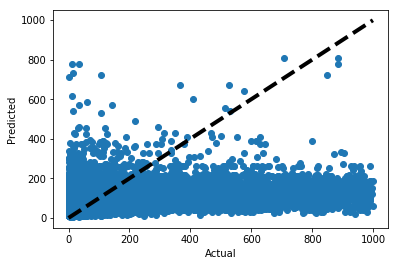

In [27]:
fig, ax = plt.subplots()
ax.scatter(val_y, y_pred)
ax.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [28]:
rf = RandomForestRegressor(n_estimators=10, max_depth=10, n_jobs=-1)

start = time.time()
rf_model = rf.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

Fit time: 1.03 / Predict time: 0.16 ---- MAE: 95.866 / R^2: 0.076


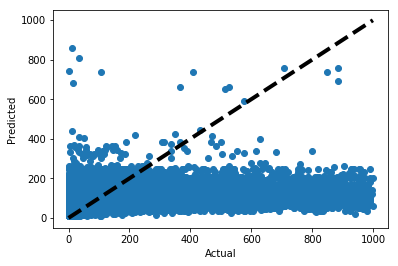

In [29]:
fig, ax = plt.subplots()
ax.scatter(val_y, y_pred)
ax.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [30]:
from xgboost import XGBRegressor
rf = XGBRegressor(n_estimators=10, max_depth=10, n_jobs=-1)

start = time.time()
rf_model = rf.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:52:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fit time: 1.855 / Predict time: 0.097 ---- MAE: 82.995 / R^2: 0.032


In [32]:
from xgboost import XGBRegressor
rf = XGBRegressor(n_estimators=100, max_depth=10, n_jobs=-1)

start = time.time()
rf_model = rf.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:52:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fit time: 15.18 / Predict time: 0.185 ---- MAE: 95.999 / R^2: 0.071


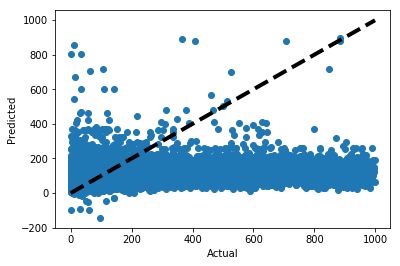

In [33]:
fig, ax = plt.subplots()
ax.scatter(val_y, y_pred)
ax.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [31]:
len(OH_train_X)

112256

In [59]:
#import pickle
#filename = 'finalized_model_demo.sav'
#pickle.dump(model, open(filename, 'wb'))

#filename = 'finalized_model_demo.sav'
#loaded_model = pickle.load(open(filename, 'rb'))
#test pickle
#from sklearn.metrics import mean_absolute_error
#extension_preds = loaded_model.predict(test_X)
#mae_x=mean_absolute_error(test_y, extension_preds)
#print('The mean absolute error is {} which is about {:.2%} of the mean extension'.format(mae_x,(mae_x/mean_x_total)))

NameError: name 'scores' is not defined